Machine Learning in a Nutshell
===
So far, we have seen what we can do with machine learning, i.e. segment images, classify them, or even generate new images. All this problems had one core aspect in common:
> We want to **learn** some function $f$ that maps an input $x$ to an output $y$.

This section explains this idea of "learning a function" in more detail with some examples for illustration.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from plot import *

/home/matthiash/code/workshop_classification/plot.py:150: SyntaxWarning: invalid escape sequence '\D'
  ax.text(xmin + 0.2, ymin + 1.0, f'$\Delta_1 + \Delta_2 + \Delta_3 = {sum}$', va='center', ha='left', bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.5), fontsize=18)


A first Experiment
---
We start with a simple example: Below we have a function $f(x)=y$ that maps an input $x$ to an output $y$. For a moment, we assume that we do not know this function $f$. All we know is that $f$ is an affine linear function, i.e. it has the form $f(x) = a \cdot x + b$ and we have an image of the function given in the plot below.

Our task is to **learn** the parameters $a$ and $b$ of this function. This means we define another function, which we call `function_to_learn`, which has the same form as $f$ but with unknown parameters $a$ and $b$. We then compare the output of `function_to_learn` to the output of $f$ in the plot below. The goal is to find the parameters $a$ and $b$ such that the output of `function_to_learn` matches the output of $f$ as closely as possible.

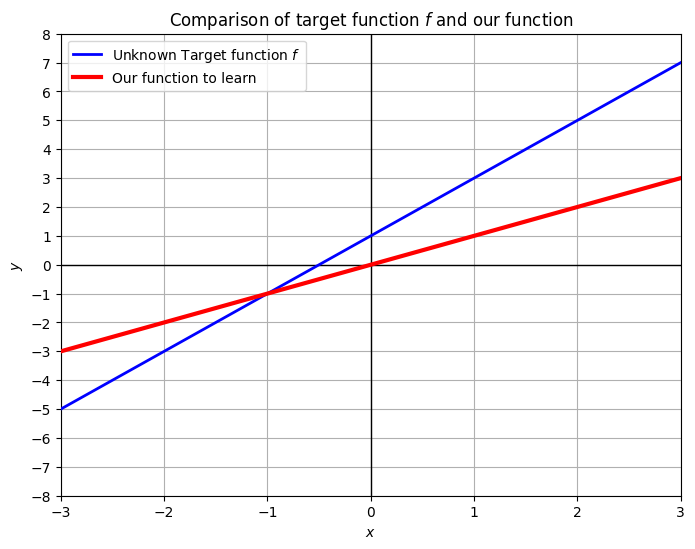

In [2]:
a = 1.0
b = 0.0
function_to_learn = lambda x: a*x + b
compare_to_target_function(function_to_learn)

However, in practice we do not know the whole image of the function $f$. Instead, we only have a few data points $(x_i, y_i)$ that we can use to learn the parameters $a$ and $b$. These data points are called **training data**. In the plot below, we consider the same problem but now we only have three data points $(x_1, y_1)$, $(x_2, y_2)$ and $(x_3, y_3)$ that we can use to learn the parameters $a$ and $b$.

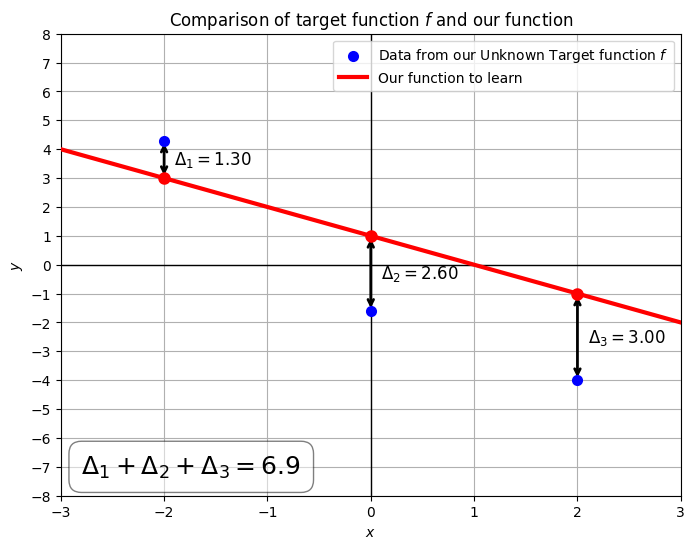

In [29]:
a = -1.0
b = 1.0
function_to_learn = lambda x: a*x + b
compare_to_target_data(function_to_learn)

What is the Problem?
===
No matter how we choose the parameters $a$ and $b$, the output of `function_to_learn` will never match the data points $(x_i, y_i)$ exactly. There might be two reasons for this:
- The function $f$ is not affine linear, i.e. it does not have the form $f(x) = a \cdot x + b$. In this case, we need to choose a different function to learn, e.g. a polynomial function or a **neural network**.
- The data points are contaminated by noise (which is often the case in practice). This means that the data points $(x_i, y_i)$ are not exactly on the function $f$, but rather close to it. In this case, we need to find a way to minimize the difference between the output of `function_to_learn` and the data points $(x_i, y_i)$.

This leads to a general procedure for a machine learning problem:
1. **Define a function to learn**: Here, we choose what shape our function should have. In the examples above, we chose an affine linear function $f(x) = a \cdot x + b$.
2. **Learn the parameters of the function**: This is done by solving an optimization problem. The task is to find the "best" parameters of our function to learn such that the output of the function matches the data points as closely as possible. In the following, we will illustrate this four the example of an affine linear function.

In the example above, our training data consists of three data points:
- $(x_1, y_1) = (-2, 4.3)$
- $(x_2, y_2) = (0, -1.6)$
- $(x_3, y_3) = (2, -4)$

We want to find $a$ and $b$ such that the output of `function_to_learn` matches these data points as closely as possible. To do this, we define a **loss function** that measures the difference between the output of `function_to_learn` and the data points $(x_i, y_i)$. The loss function is defined as follows:
$$
\text{loss}(a, b) = |\textcolor{red}{a \cdot x_1 + b} - y_1|^2 + |\textcolor{red}{a \cdot x_2 + b} - y_2|^2 + |\textcolor{red}{a \cdot x_3 + b} - y_3|^2
$$

Note that taking the square just helps us for the computations later on.

The Problem
===
Now that we defined our $\text{loss}$, we can formulate our optimization problem:
>Find the parameters $a, b \in \mathbb{R}$ such that the loss function $\text{loss}(a, b)$ takes its minimum value.

To illustrate what we are searching for, we plot the loss function in the following figure below.

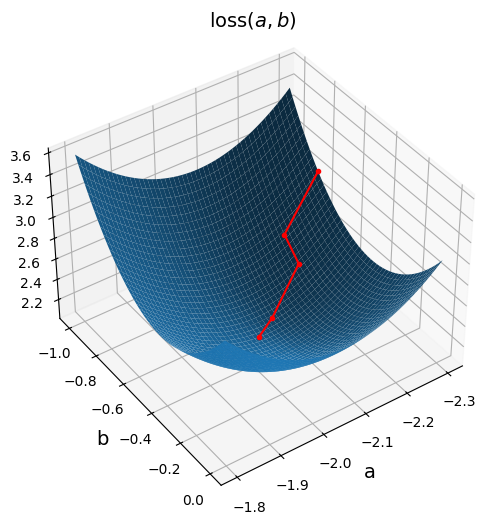

In [83]:
loss = lambda a, b: (a * -2 + b - 4.3)**2 + (a * 0 + b + 1.6)**2 + (a * 2 + b + 4)**2

sequence = [(-2.3, -0.8), (-2.2, -0.75), (-2.2, -0.65), (-2.1, -0.55), (-2.05, -0.5)]
def plot_2d_function(func, x_range, y_range, filename=""):
    x = np.linspace(x_range[0], x_range[1], 400)
    y = np.linspace(y_range[0], y_range[1], 400)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')

    surface = ax.plot_surface(X, Y, Z, color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0],alpha=1.0)  # Use default matplotlib blue with transparency

    z = [func(a, b) for a, b in sequence]
    ax.plot([a for a,b in sequence], [b for a,b in sequence], z, color='red', alpha=1.0, marker='o', markersize=3, zorder=5)

    ax.set_xlabel("a", fontsize=14)
    ax.set_ylabel("b", fontsize=14)
    ax.view_init(elev=40, azim=55)

    # ax.set_zlabel("z", fontsize=14)
    # ax.set_title("Surface Plot of the Function", fontsize=16)
    #ax.invert_xaxis()  # Flip the x-axis

    plt.title("$\\text{loss}(a,b)$", fontsize=14)
    if filename:
        plt.savefig(filename)
    plt.show()
plot_2d_function(loss, (-2.3, -1.8), (-1,0))